**Exploratory data analysis about Road accidents**

Every year the lives of approximately 1.3 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

The safe system approach to road safety aims to ensure a safe transport system for all road users. Such an approach takes into account people’s vulnerability to serious injuries in road traffic crashes and recognizes that the system should be designed to be forgiving of human error. The cornerstones of this approach are safe roads and roadsides, safe speeds, safe vehicles, and safe road users, all of which must be addressed in order to eliminate fatal crashes and reduce serious injuries.

In [107]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

print("Setup complete")

Setup complete


*Reading data and cleaning*

In [70]:
road_accidents_df = pd.read_excel('Road Accidents.xlsx')
road_accidents_df.to_csv('Road Accidents.csv',index = None , header = True)
road_accidents_df.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car


In [96]:
road_accidents_df.dropna()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,110592051.0,428984.0,435435.0,1.0,2011-12-31,1305.0,A,Wet / Damp,Daylight: street lights present,Raining without high winds,Pedestrian,Slight,Male,10.0,Car
2600,110592833.0,428058.0,432860.0,1.0,2011-12-31,128.0,Unclassified,Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Passenger,Slight,Male,17.0,Car
2601,110593050.0,435402.0,436161.0,1.0,2011-12-31,1000.0,Unclassified,Wet / Damp,Daylight: street lights present,Fine with high winds,Passenger,Slight,Female,79.0,Bus or coach (17 or more passenger seats)
2602,110593522.0,431237.0,434797.0,2.0,2011-12-31,1445.0,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,24.0,Car


In [126]:
start = 1
road_accidents_df.insert(0, 'ID', range(start, start + road_accidents_df.shape[0]))

A galance at dataframe

In [71]:
road_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reference Number     2604 non-null   float64       
 1   Easting              2604 non-null   float64       
 2   Northing             2604 non-null   float64       
 3   Number of Vehicles   2604 non-null   float64       
 4   Accident Date        2604 non-null   datetime64[ns]
 5   Time (24hr)          2604 non-null   float64       
 6   1st Road Class       2604 non-null   object        
 7   Road Surface         2604 non-null   object        
 8   Lighting Conditions  2604 non-null   object        
 9   Weather Conditions   2604 non-null   object        
 10  Casualty Class       2604 non-null   object        
 11  Casualty Severity    2604 non-null   object        
 12  Sex of Casualty      2604 non-null   object        
 13  Age of Casualty      2604 non-nul

In [128]:
road_accidents_df.head()

,ID,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,2,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,3,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,4,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,5,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car


*1.) Accidents due to differnt tyoes of road condtions*

In [72]:
road_accidents_df['Road Surface'].unique()

array(['Wet / Damp', 'Dry', 'Frost / Ice', 5.0], dtype=object)

In [129]:

px.pie(road_accidents_df,values='ID' , names='Road Surface',template = 'plotly_dark')

we can see from the above pie chart that about 74.1% of accidents occur in dry condtion and about 24% accidents occur in wet/damp conditions

*2.) Age group of Casualty*

In [73]:
road_accidents_df['Age of Casualty'].head(10)

0    62.0
1    39.0
2    66.0
3    39.0
4    29.0
5    26.0
6    11.0
7    61.0
8    30.0
9    59.0
Name: Age of Casualty, dtype: float64

<AxesSubplot:title={'center':'Age of casualty'}, xlabel='Age of Casualty', ylabel='Count'>

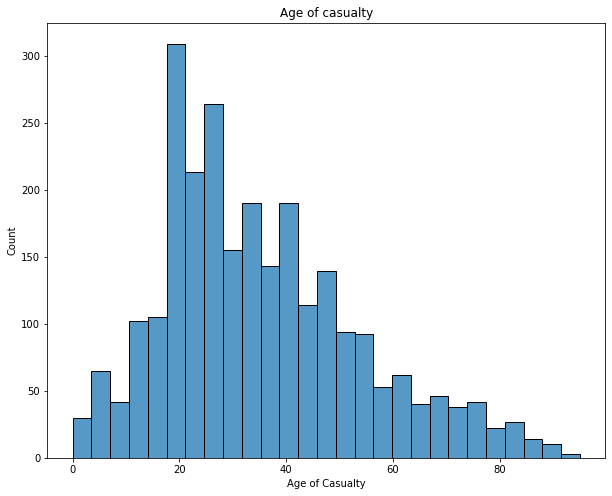

In [118]:
plt.figure(figsize=(10,8))
plt.title("Age of casualty")

sns.histplot(data= road_accidents_df, x = road_accidents_df['Age of Casualty'])
# using plotly
# px.histogram(road_accidents_df, x = road_accidents_df['Age of Casualty'])


we can from the above histogram that age around 20 to 25 years have the highest risk of accident

*3.) Casualty class*

In [74]:
road_accidents_df['Casualty Class'].unique()

array(['Driver', 'Pedestrian', 'Passenger'], dtype=object)

<AxesSubplot:title={'center':'Casualty Class'}, xlabel='Casualty Class', ylabel='count'>

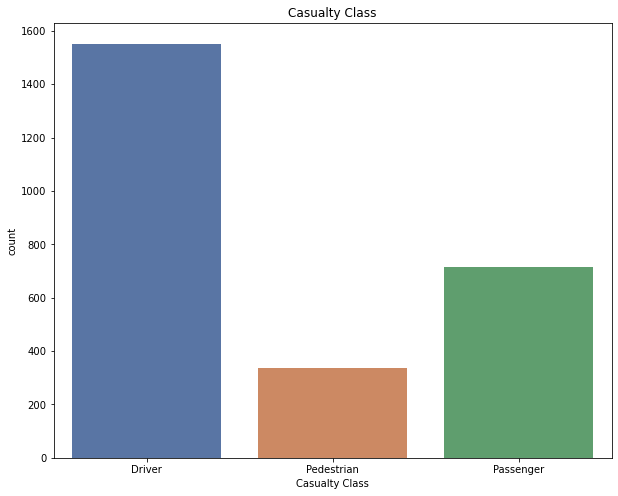

In [135]:
plt.figure(figsize = (10,8))
plt.title("Casualty Class")

sns.countplot(data = road_accidents_df , x =road_accidents_df['Casualty Class'],palette =  "deep")

*From the above bar graph we can see that driver class has the highest number of accident*

*4.)Severity of casualty*

In [75]:
road_accidents_df['Casualty Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

<AxesSubplot:title={'center':'Casualty severity'}, xlabel='Casualty Severity', ylabel='count'>

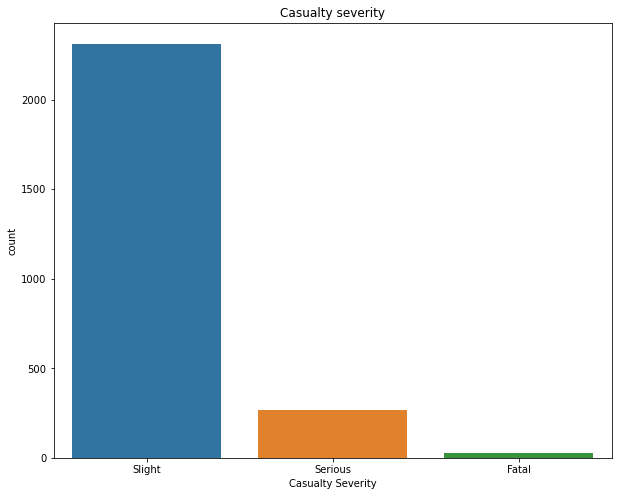

In [105]:
plt.figure(figsize = (10,8))
plt.title("Casualty severity")

sns.countplot(data=road_accidents_df,x = road_accidents_df['Casualty Severity'])


From the above bar graph we can see that most occured had slight casualty

*5.) Differnt types of vehicles*

In [76]:
road_accidents_df['Type of Vehicle'].unique()

array(['Car', 'Goods vehicle 3.5 tonnes mgw and under', 'Pedal cycle',
       'Bus or coach (17 or more passenger seats)',
       'Minibus (8 – 16 passenger seats)', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Other Vehicle', 'Goods vehicle 7.5 tonnes mgw and over',
       'M/cycle 50cc and under', 'Ridden horse',
       'Agricultural vehicle (includes diggers etc.)'], dtype=object)

In [115]:
px.pie(road_accidents_df,values = road_accidents_df['Reference Number'],names=road_accidents_df['Type of Vehicle'],template = 'plotly_dark')

From above pie chart we can see that car accident are most common

*6.) Gender of Casualty*

In [78]:
road_accidents_df['Sex of Casualty'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:title={'center':'gender'}, xlabel='Sex of Casualty', ylabel='count'>

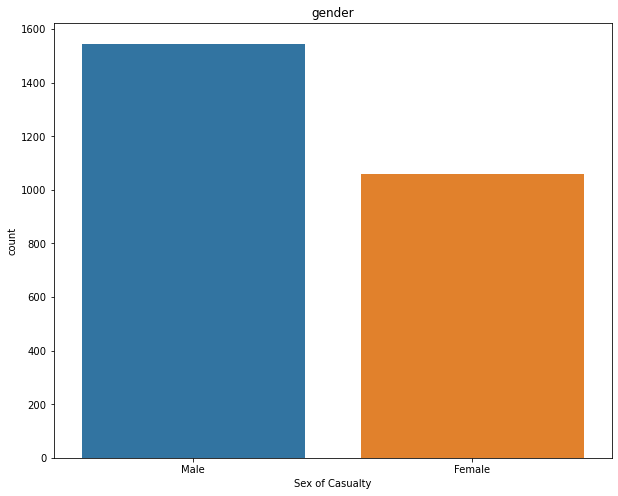

In [80]:
plt.figure(figsize = (10,8))
plt.title("gender")

sns.countplot(data= road_accidents_df,x= road_accidents_df['Sex of Casualty'])

From above bar graph we can see that men are more likely to into accident

*7.) increase in accidents*

In [127]:
px.line(road_accidents_df,x = 'Accident Date',y ='ID' )

From the above line plot we can see that there is a huge increase in number of accidents

**Conclusion**
<br>
As we saw from our analysis that the day accidents are increasing day by day , we can take some steps to reduse it 
    
some of them are :

    Drive in the prescribed speed limits on the various roads.
    Always put on helmets, seat belts and other safety equipments before driving a bicycle/ motor cycle/vehicle.
    Do not drink and drive. 
    Never use mobile phones or ear phones while driving.